In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, LassoLars
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, d2_pinball_score
from sklearn.metrics import max_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance


In [74]:
def generate_prediction(classifier_model, train_x, train_y, test_x):

    trained_model = classifier_model.fit(train_x, train_y)
    
    prediction = trained_model.predict(test_x)

    return prediction


def plot_graph(stock_df, test_x, test_y, prediction_y, model_name):    
    ax = plt.axes()
    ax.grid()
    ax.set(xlabel='Date', ylabel='Stock Price', title=model_name)
    test_x['date'] = stock_df['date']

    ax.plot(stock_df['date'], stock_df['close'], label='actual', c='b', linewidth=1)
    ax.plot(test_x['date'], test_y, label='test', c='r', linewidth=1)
    ax.plot(test_x['date'], prediction_y, label='prediction', c='g', linewidth=1)

    ax.xaxis.set_major_locator(mticker. MultipleLocator(18))

    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    plt.tight_layout()
    plt.legend()
    plt.show()


def calculate_metrics(y_true, y_pred, model_name):
    metric_list = [r2_score, explained_variance_score, d2_pinball_score, max_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error, mean_poisson_deviance]
    metric_names = ['r2_score', 'explained_variance_score', 'd2_pinball_score', 'max_error', 'mean_squared_error', 'median_absolute_error', 'mean_absolute_percentage_error', 'mean_poisson_deviance']

    print(f"Model: {model_name}")
    
    for idx, metric in enumerate(metric_list):
        metric_result = metric(y_true, y_pred)
        print(f"{metric_names[idx]}: {metric_result}")

    print("------------\n\n")


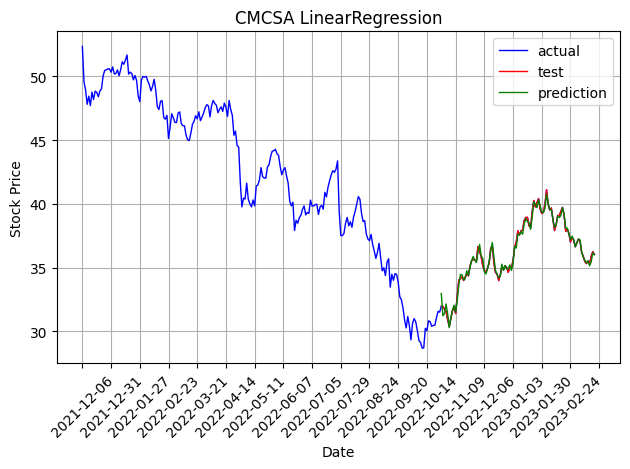

Model: CMCSA LinearRegression
r2_score: 0.9895962698940125
explained_variance_score: 0.989599214161593
d2_pinball_score: 0.909472856968308
max_error: 0.9882827600372721
mean_squared_error: 0.06466240821839056
median_absolute_error: 0.12822713513776307
mean_absolute_percentage_error: 0.0051936906785884805
mean_poisson_deviance: 0.0018554098905053766
------------




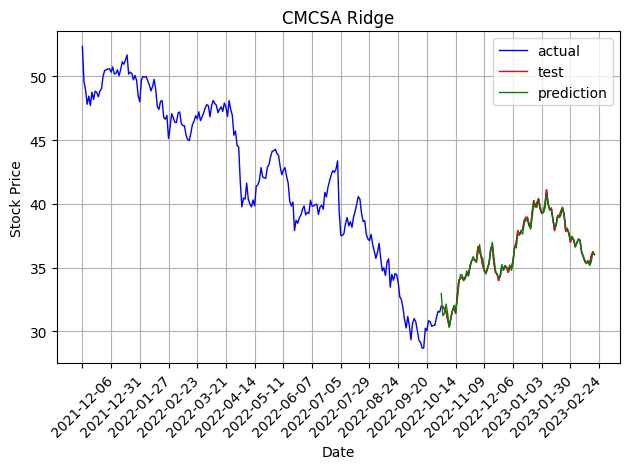

Model: CMCSA Ridge
r2_score: 0.9895274138411272
explained_variance_score: 0.9895343381879157
d2_pinball_score: 0.9081872121817745
max_error: 0.9864943028062214
mean_squared_error: 0.06509036993544953
median_absolute_error: 0.12438541934555758
mean_absolute_percentage_error: 0.005258426971274562
mean_poisson_deviance: 0.0018647633243316407
------------




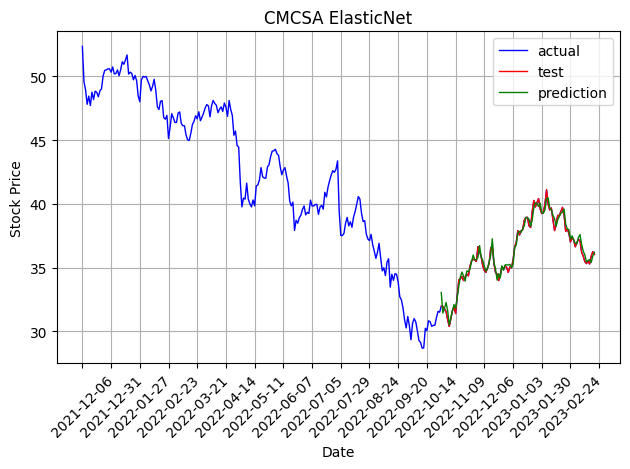

Model: CMCSA ElasticNet
r2_score: 0.9778026505400866
explained_variance_score: 0.9787019120412488
d2_pinball_score: 0.8573695227881986
max_error: 1.074092882518812
mean_squared_error: 0.13796340903895038
median_absolute_error: 0.23270949229909377
mean_absolute_percentage_error: 0.008063153395504761
mean_poisson_deviance: 0.0038230082764925716
------------




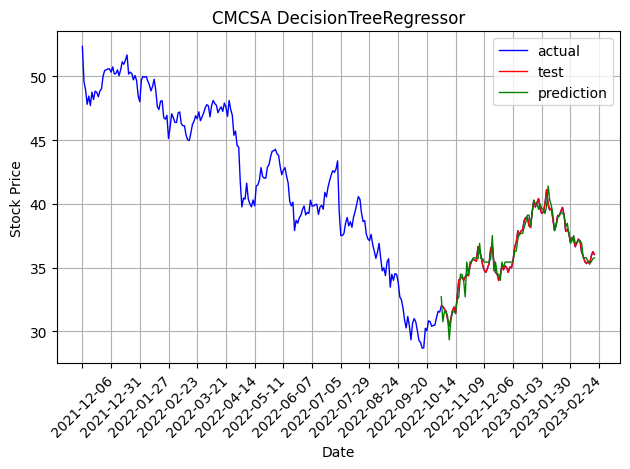

Model: CMCSA DecisionTreeRegressor
r2_score: 0.9554055969382221
explained_variance_score: 0.9554603867483783
d2_pinball_score: 0.8049113233287859
max_error: 1.5599999999999952
mean_squared_error: 0.27716804123711325
median_absolute_error: 0.30000000000000426
mean_absolute_percentage_error: 0.011071818689282748
mean_poisson_deviance: 0.007763261385200044
------------




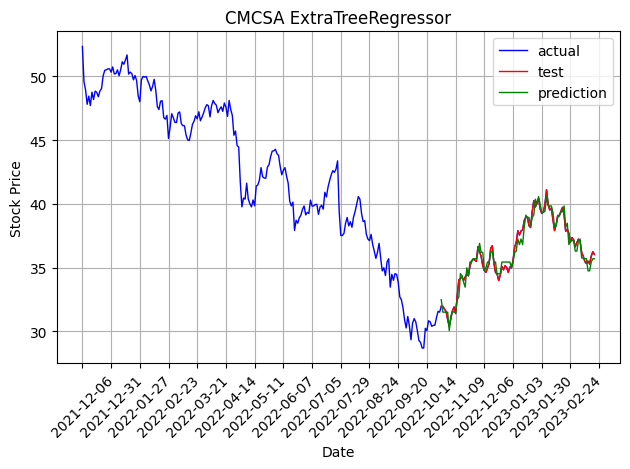

Model: CMCSA ExtraTreeRegressor
r2_score: 0.9653408238265007
explained_variance_score: 0.9655350257537073
d2_pinball_score: 0.818452832095397
max_error: 1.3200000000000003
mean_squared_error: 0.21541752577319592
median_absolute_error: 0.3300000000000054
mean_absolute_percentage_error: 0.010237102191030944
mean_poisson_deviance: 0.005964579045285482
------------




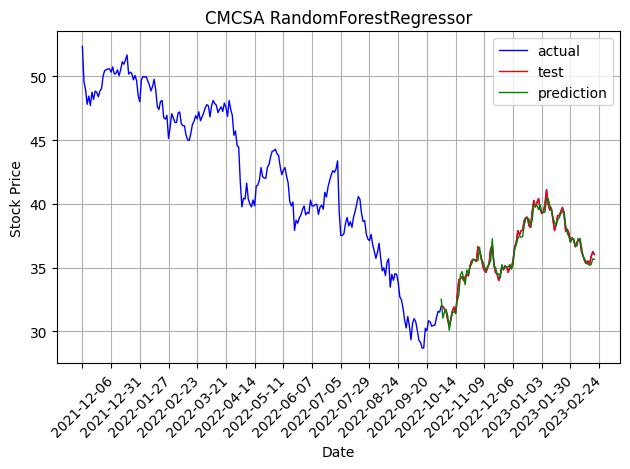

Model: CMCSA RandomForestRegressor
r2_score: 0.9759861624894797
explained_variance_score: 0.9769082085546031
d2_pinball_score: 0.8524061442069601
max_error: 1.157700000000041
mean_squared_error: 0.14925344546392208
median_absolute_error: 0.2644000000000233
mean_absolute_percentage_error: 0.008322965124815507
mean_poisson_deviance: 0.004156194577521227
------------




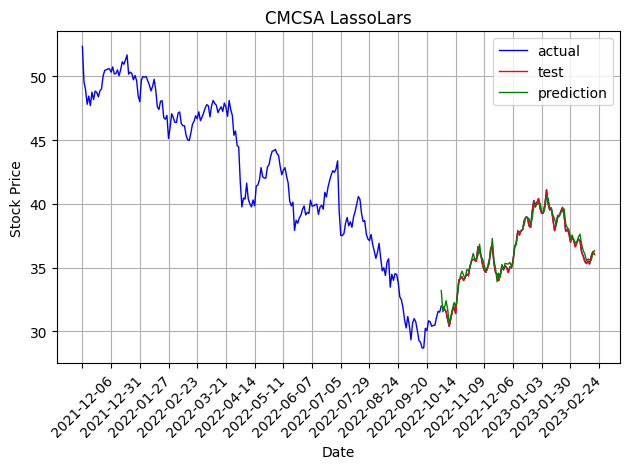

Model: CMCSA LassoLars
r2_score: 0.9769653017936318
explained_variance_score: 0.9807098743380909
d2_pinball_score: 0.8505707204803877
max_error: 1.225737285886737
mean_squared_error: 0.14316779111276573
median_absolute_error: 0.2714608776657812
mean_absolute_percentage_error: 0.008533895510294032
mean_poisson_deviance: 0.004025769830353292
------------




In [75]:

ticker_symbol = 'CMCSA'

candle_csv_file_path = './data/candlestick_data.csv'

all_stock_df = pd.read_csv(candle_csv_file_path, header = 0).sort_values(by=['unix_time'])

company_stock_data_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol]

stock_analysis_data_df = company_stock_data_df.drop('date', axis=1).drop('symbol', axis = 1).drop('unix_time', axis=1)

data_x = stock_analysis_data_df.loc[:,stock_analysis_data_df.columns != 'close' ]
data_y = stock_analysis_data_df['close']

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, shuffle=False, random_state=1)

models = [LinearRegression(), Ridge(), ElasticNet(), DecisionTreeRegressor(), ExtraTreeRegressor(), RandomForestRegressor(), LassoLars()]
prediction_list = []

for model in models:
    prediction = generate_prediction(model, x_train, y_train, x_test)
    prediction_list.append([prediction, ticker_symbol + " " + str(model)[:-2]])

for prediction in prediction_list:
    plot_graph(company_stock_data_df, x_test, y_test, prediction[0], prediction[1])
    calculate_metrics(y_test, prediction[0], prediction[1])


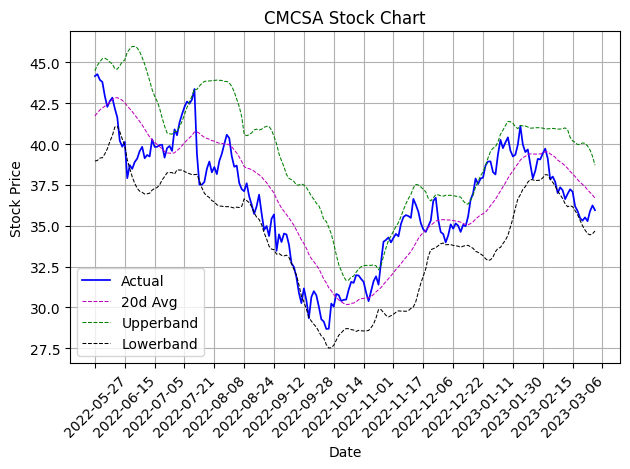

In [76]:
ticker_symbol = 'CMCSA'

tech_indicators_csv_file_path = './data/technical_indicators.csv'

all_stock_df = pd.read_csv(tech_indicators_csv_file_path, header = 0)

company_stock_df = all_stock_df[all_stock_df['symbol'] == ticker_symbol].drop('symbol', axis = 1)

time_with_missing_data = company_stock_df[company_stock_df.moving_avg == 0].iloc[0]['unix_time']

stock_technical_df = company_stock_df[company_stock_df['unix_time'] > time_with_missing_data].sort_values(by=['unix_time'])

ax = plt.axes()
ax.grid()
ax.set(xlabel='Date', ylabel='Stock Price', title=ticker_symbol + ' Stock Chart')

ax.plot(stock_technical_df['date'], stock_technical_df['close'], label='Actual', c='b', linewidth=1.25)
ax.plot(stock_technical_df['date'], stock_technical_df['middleband'], label='20d Avg', c='m', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['upperband'], label='Upperband', c='g', linewidth=.75, linestyle = 'dashed')
ax.plot(stock_technical_df['date'], stock_technical_df['lowerband'], label='Lowerband', c='k', linewidth=.75, linestyle = 'dashed')

ax.xaxis.set_major_locator(mticker. MultipleLocator(12))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
plt.legend()
plt.show()

